In [2]:
%matplotlib inline

from __future__ import absolute_import

import numpy as np

import ghostpy.Invariants.LShell as ls
import ghostpy.algorithms.convert as algx
import ghostpy.algorithms.common as algc
import ghostpy.data.VtkData as vdt
import cProfile, pstats, StringIO
import ghostpy.data.GpData as gpd
import ghostpy.plotting.FieldLinePlot as flplt
import ghostpy.Invariants.FieldLine as fl
import random as rnd
import csv
from parse import *

import matplotlib.pylab as plt

import glob

In [3]:
outpath = "/Volumes/8TB Seagate/PhD Data/profiles/"
data = vdt.VtkData(filename="unit_tests/test_data/WHIQuad.vts", vector='B')

In [5]:
pt = [0.0, 3.5, 4.99]
ls1 = ls.LShell(data=data, start_loc=pt, save_lines=True, pre_converge=False)
phi = algc.cart_to_sphere(pt)[2]
stats = ls1.__search_B_adaptive__(phi_0=phi, debug=True)




VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV
Calculating L*, K for point [0.0, 3.5, 4.99]


K_LIST: [ 645.45271937  671.59871885  671.60184067]
B_mirror = 234.244091626
K = 671.60184067
Start Phi: 1.57079632679
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


1.16665914912
B Gap Initial: None
B Gap Initial: None
B Gap Initial: None
B Gap Initial: None
B Gap Initial: None


B Gap Initial: -155.160063501
Moving inner boundary in


B Gap Initial: -22.303773546


B Gap Initial: 283.379038634


sB_gap: 49.0538519912


sB_gap: 2.23631135124


sB_gap: -7.70188147586


sB_gap: -2.03987250658


sB_gap: -4.04890918531


sB_gap: 1.85108666407


sB_gap: 1.15828834785


sB_gap: -2.73421816762


sB_gap: -6.10434046202


sB_gap: -0.692105853581


sB_gap: -2.15445852336


sB_gap: 3.12826208872


sB_gap: 3.04608627292


sB_gap: -3.1120623679


sB_gap: 1.15757068796


sB_gap: -1.5794772405


sB_gap: 0.430873331586


sB_gap: -2.56039868918


sB_gap: -7.4908781166


sB_gap: -0.121084205504


sB_gap: -8.15803077627


sB_gap: -0.542538136036


sB_gap: 1.41012038208


In [21]:
bklsit = stats['tau_in'][-1]
bklsit2 = stats['tau_out'][-1]
assert isinstance(bklsit, fl.FieldLine)

idx = bklsit.get_b_loc(b=ls1.b)

bloc = bklsit.m_trace[idx]

print (bklsit.__get_min_b_gap__(k=ls1.k, b=ls1.b))
print (bklsit2.__get_min_b_gap__(k=ls1.k, b=ls1.b))

fpl_in = bklsit.get_footprint_rlp(re=3.0)[1]
fpl_out = bklsit2.get_footprint_rlp(re=3.0)[1]
fpl_orig = ls1.lines[ls1.lines.keys()[0]][0].get_footprint_rlp(re=3.0)[1]

print ("Footprint in: {}".format(fpl_in))
print ("Footprint out: {}".format(fpl_out))
print ("Footprint orig: {}".format(fpl_orig))

error1 = np.abs(fpl_orig - fpl_in)

print ("Error 1: {}".format(fpl_orig - fpl_in))
print ("Error 2: {}".format(fpl_orig - fpl_out))

0.430873331586
-0.121084205504
Footprint in: 1.18398235378
Footprint out: 1.18398242733
Footprint orig: 1.17702752968
Error 1: -0.00695482409879
Error 2: -0.00695489764705


We have 1 retained lines.


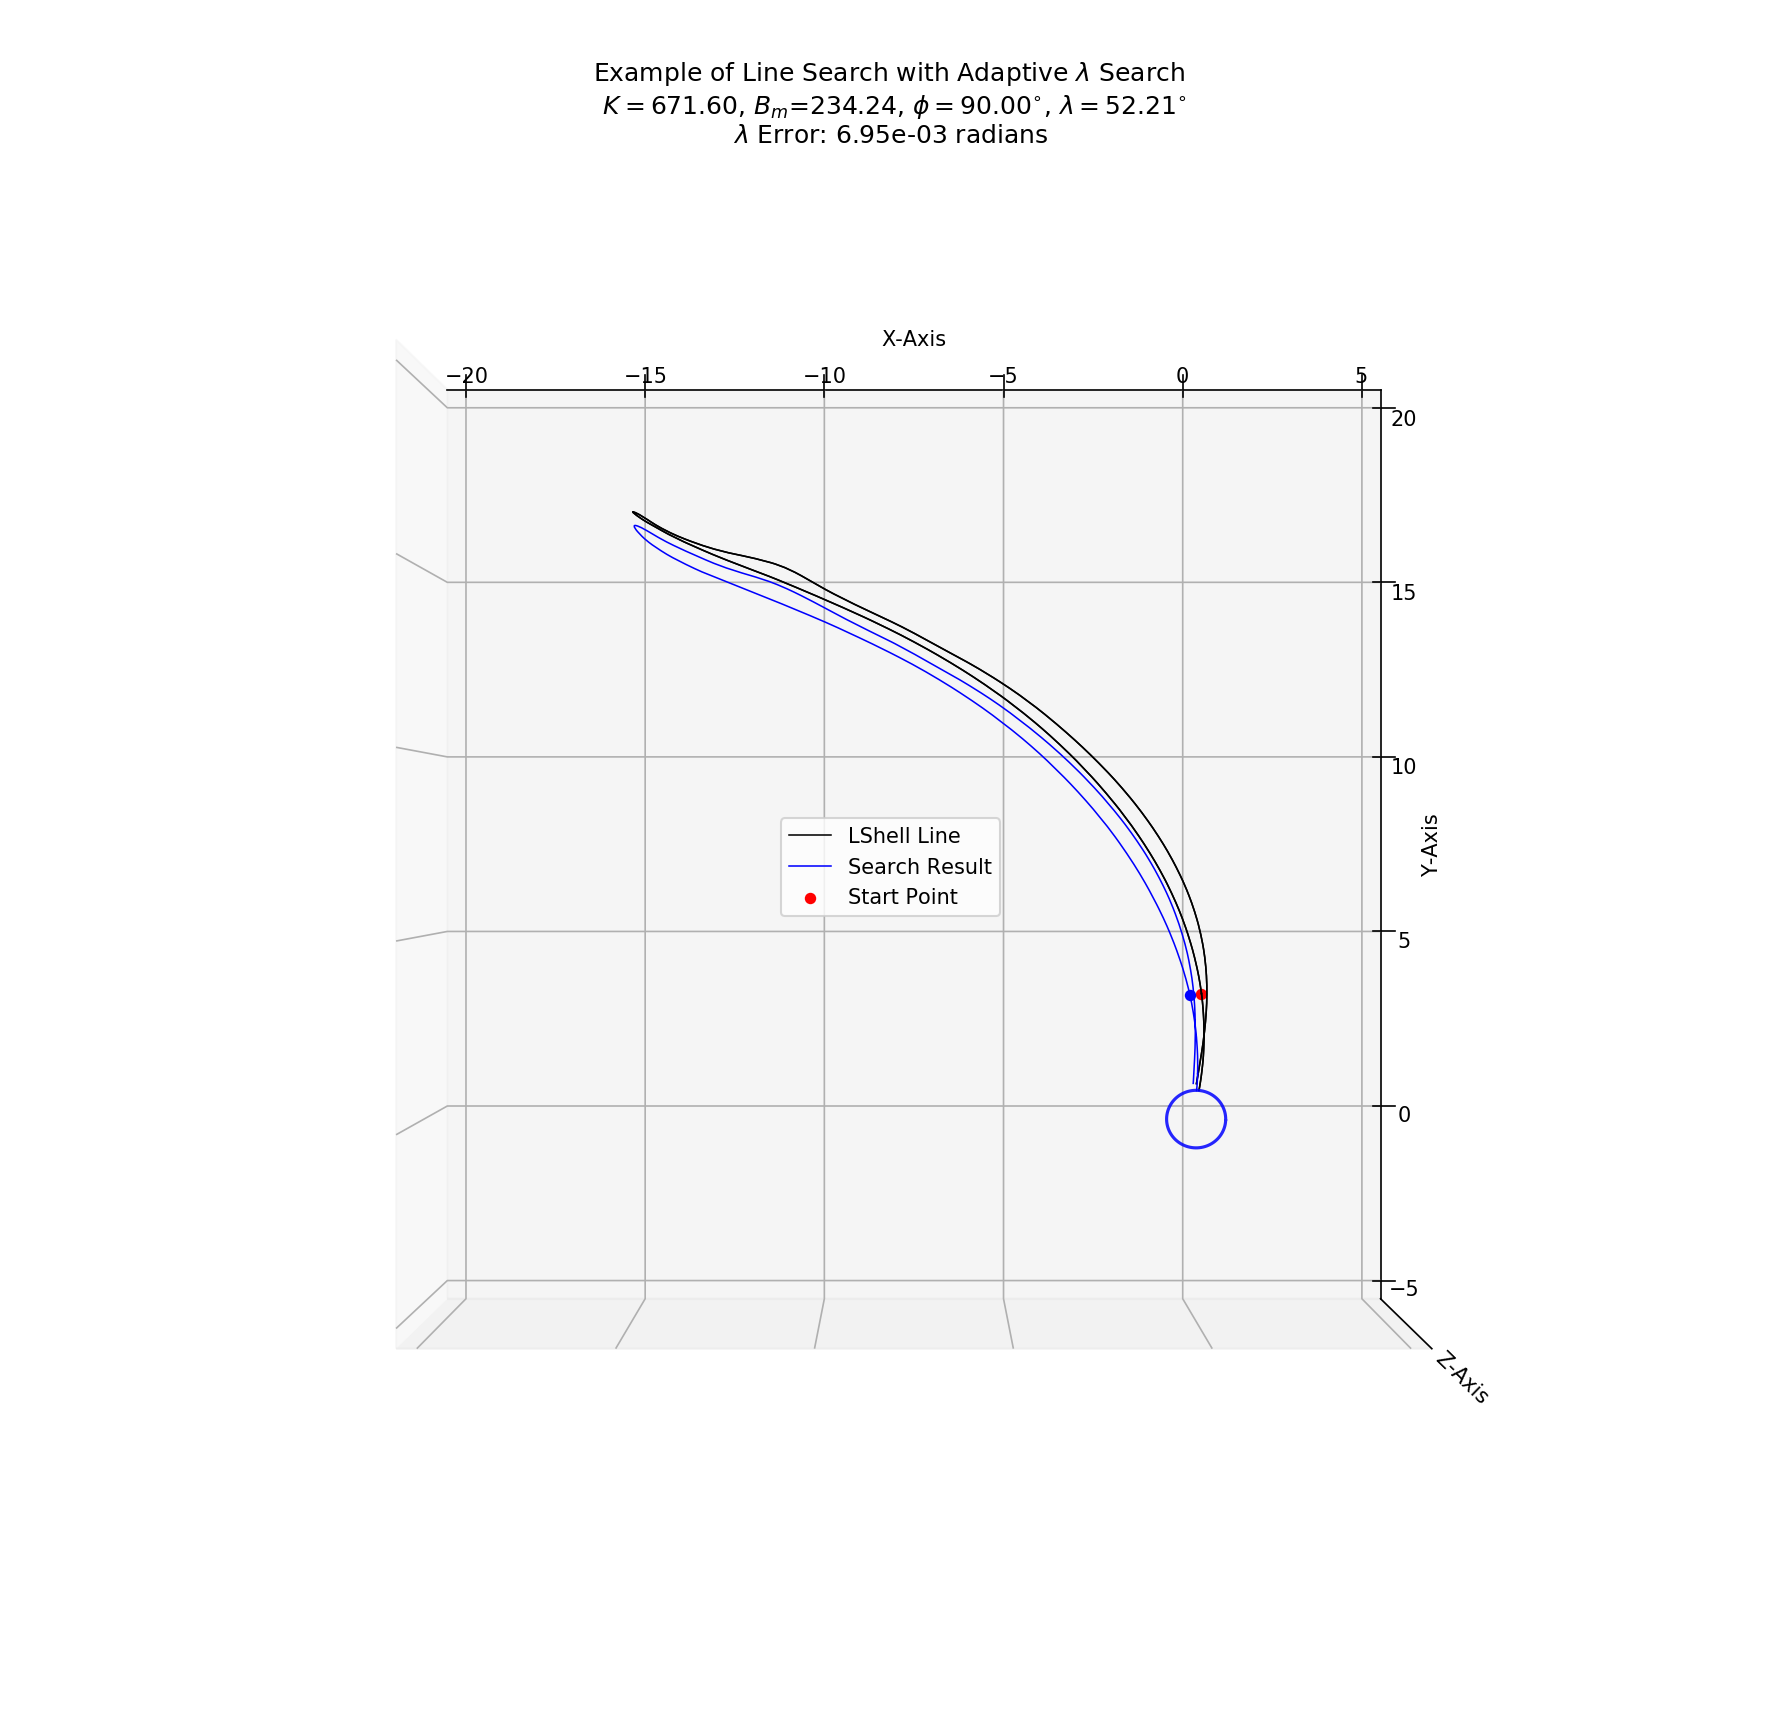

In [25]:
plot = flplt.FieldLinePlot()
plot.plot_shell_field_lines(ls1)
plot.plot_drift_boundary(ls1)
# plot.changeCameraAngle(55,200)
plot.changeCameraAngle(90,270)

plot.set_axes_lim([[-20,5], [-5,20], [-5,10]])

# for line in stats['tau']:
#     plot.addFieldLine(line, color='g-.', label="Search Progression")

plot.add_title("Example of Line Search with Adaptive $\lambda$ Search \n $K=${:.2f}, $B_m$={:.2f}, $\phi={:.2f}^{{\circ}}$, $\lambda={:.2f}^{{\circ}}$\n$\lambda$ Error: {:.2e} radians".format(ls1.k, ls1.b, algx.rad_to_deg(phi), algx.rad_to_deg(algc.cart_to_sphere(pt)[1]*0.95), error1))

plot.addFieldLine(stats['tau_in'][-1], color='b-', label="Search Result")
# plot.addFieldLine(stats['tau_out'][-1], color='k--')
    
for pt in stats['loc_t']:
    plot.add_point(pt)
    # plt.draw()
    # plt.pause(.001)
    
plot.ax.set_zticks([])

plot.add_point(bloc[0], color='blue')
plot.legend(loc='center')
plot.show()
plot.savePDF("/Volumes/8TB Seagate/PhD Data/profiles/adaptSearch.pdf")

We have 1 retained lines.


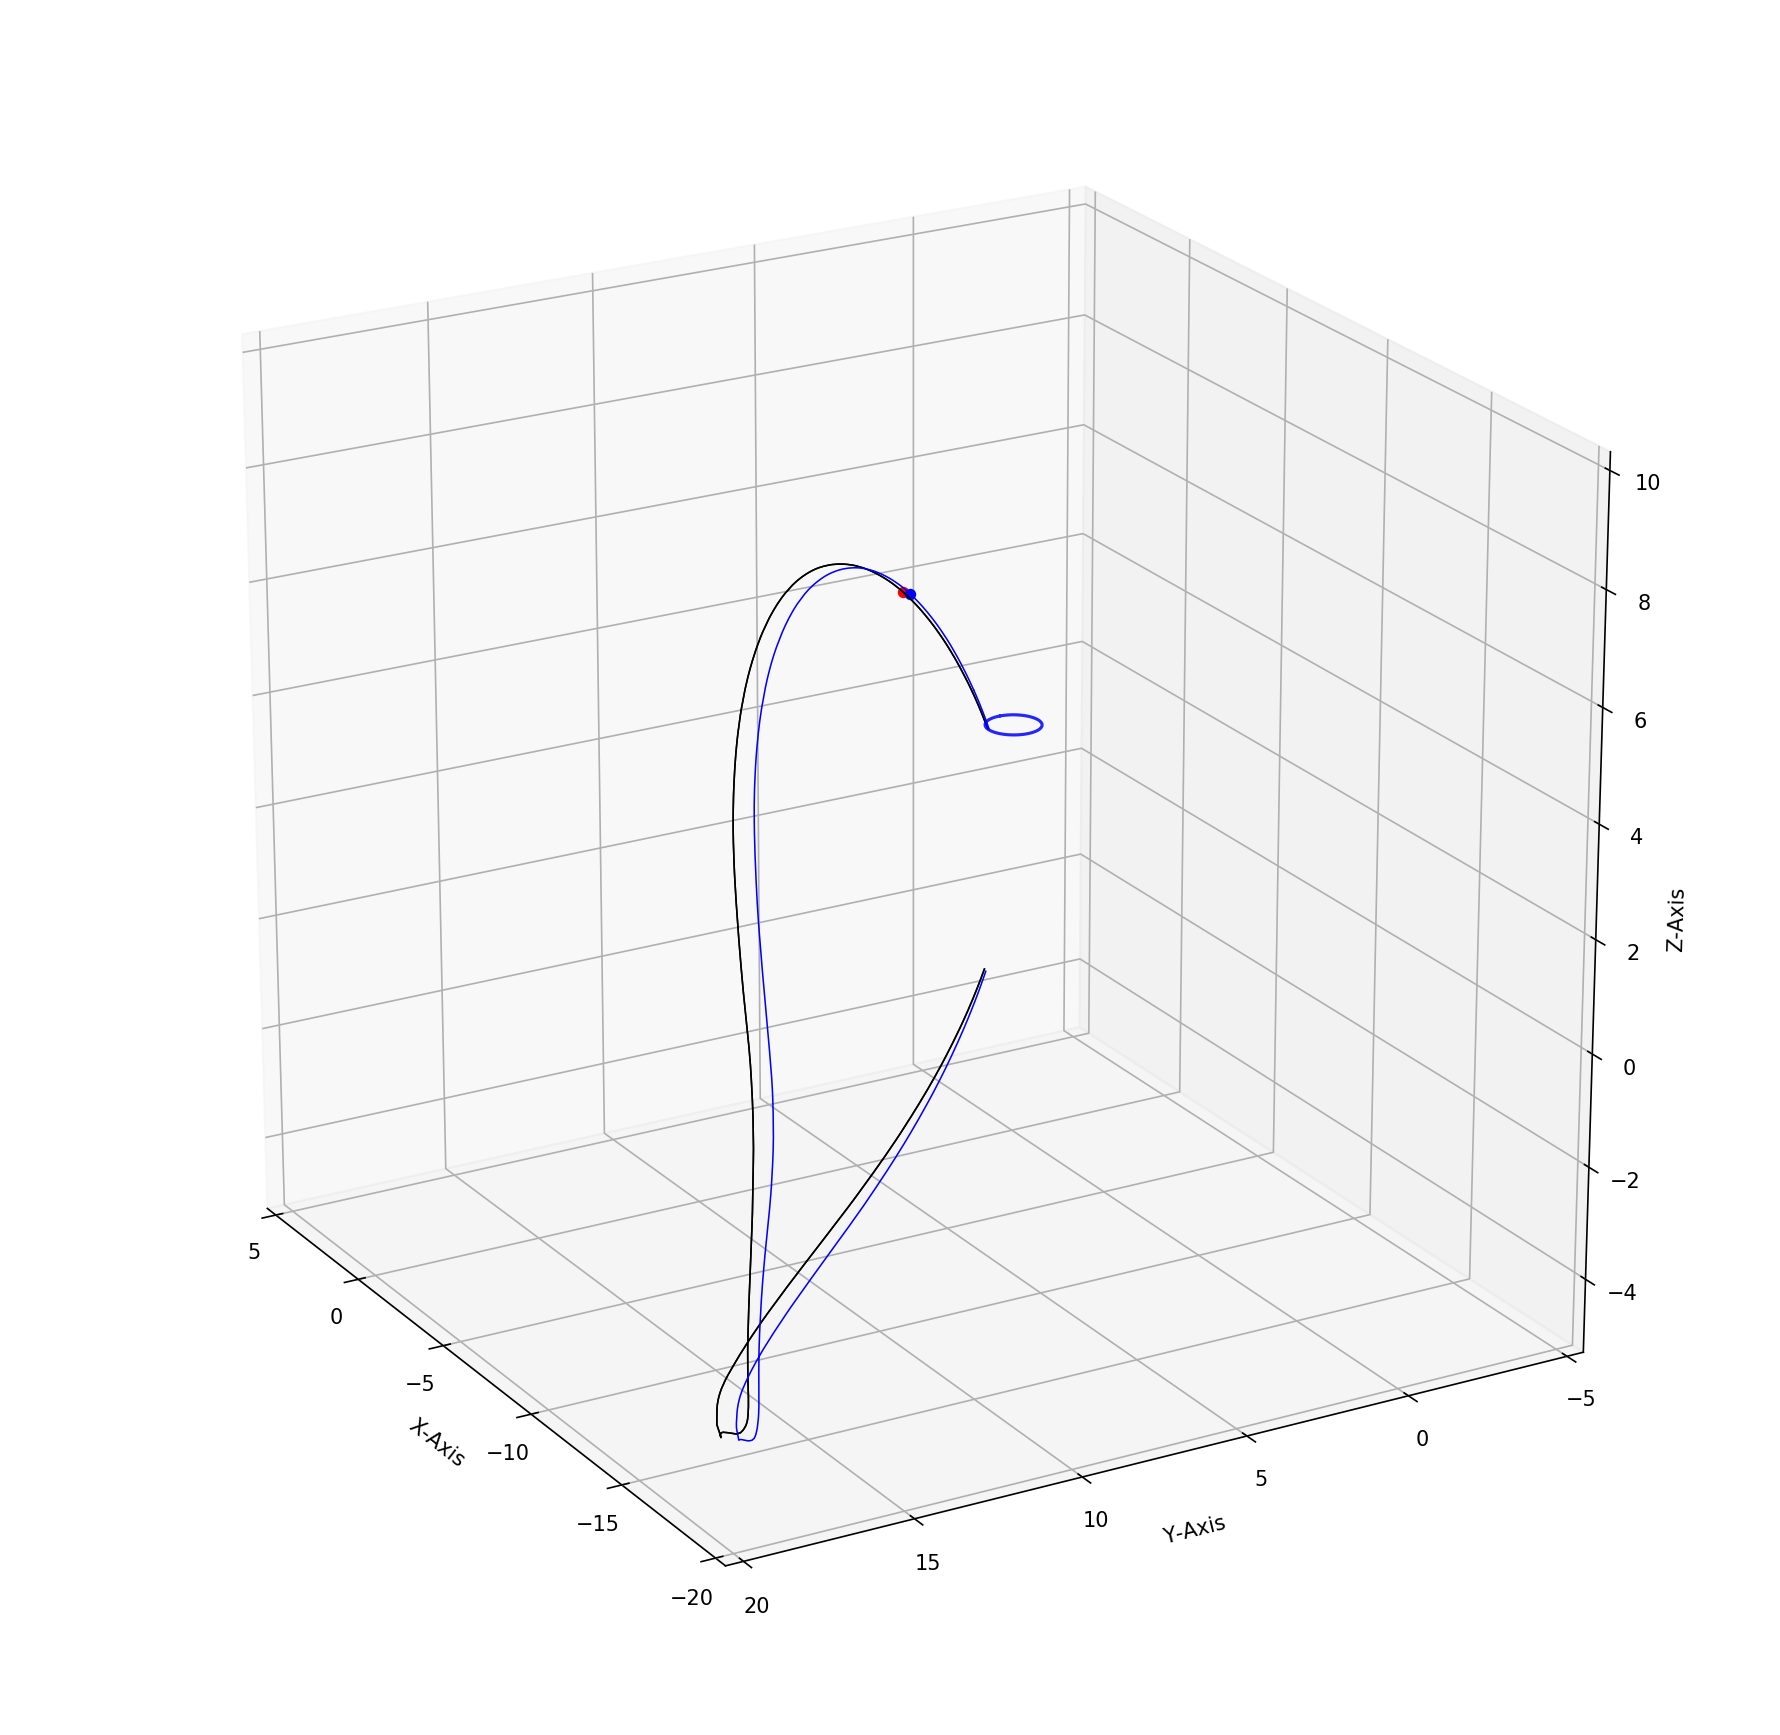

In [30]:
plot = flplt.FieldLinePlot()
plot.plot_shell_field_lines(ls1)
plot.plot_drift_boundary(ls1)
# plot.changeCameraAngle(55,200)
plot.changeCameraAngle(22,150)

plot.set_axes_lim([[-20,5], [-5,20], [-5,10]])

# for line in stats['tau']:
#     plot.addFieldLine(line, color='g-.', label="Search Progression")

# plot.add_title("Example of Line Search with Adaptive $\lambda$ Search \n $K=${:.2f}, $B_m$={:.2f}, $\phi={:.2f}^{{\circ}}$, $\lambda={:.2f}^{{\circ}}$\n$\lambda$ Error: {:.2e} radians".format(ls1.k, ls1.b, algx.rad_to_deg(phi), algx.rad_to_deg(algc.cart_to_sphere(pt)[1]*0.95), error1))

plot.addFieldLine(stats['tau_in'][-1], color='b-', label="Search Result")
# plot.addFieldLine(stats['tau_out'][-1], color='k--')
    
for pt in stats['loc_t']:
    plot.add_point(pt)
    # plt.draw()
    # plt.pause(.001)
    
# plot.ax.set_zticks([])

plot.add_point(bloc[0], color='blue')
# plot.legend(loc='center')
plot.show()
plot.savePDF("/Volumes/8TB Seagate/PhD Data/profiles/adaptSearch2.pdf")